<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/Data_acquisation_case_study_Shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json

Extract Data:

In [11]:
df_pop = pd.read_csv("/content/population.csv")
df_gdp = pd.read_excel("/content/gdp.xlsx")
df_int = pd.read_json("/content/internet_users.json")
df_lit = pd.read_xml("/content/literacy_rate.xml")

Transform Data:

In [12]:
print(df_gdp.columns)

Index(['Country', 'GDP'], dtype='object')


In [13]:
print(df_gdp['Country'].unique())

['United States' 'China' 'India' 'Japan' 'Germany' 'Russia' 'Brazil'
 'United Kingdom' 'France' 'Italy' 'Canada' 'Australia' 'South Korea'
 'Spain' 'Mexico' 'Indonesia' 'Turkey' 'Saudi Arabia' 'Argentina'
 'South Africa']


In [14]:
df_pop.columns

Index(['country', 'population'], dtype='object')

In [17]:
df_pop['country'].unique()

array(['United States', 'China', 'India', 'Japan', 'Germany', 'Russia',
       'Brazil', 'United Kingdom', 'France', 'Italy', 'Canada',
       'Australia', 'South Korea', 'Spain', 'Mexico', 'Indonesia',
       'Turkey', 'Saudi Arabia', 'Argentina', 'South Africa'],
      dtype=object)

In [15]:
df_int.columns

Index(['country', 'internet_users'], dtype='object')

In [18]:
df_int['country'].unique()

array(['United States', 'China', 'India', 'Japan', 'Germany', 'Russia',
       'Brazil', 'United Kingdom', 'France', 'Italy', 'Canada',
       'Australia', 'South Korea', 'Spain', 'Mexico', 'Indonesia',
       'Turkey', 'Saudi Arabia', 'Argentina', 'South Africa'],
      dtype=object)

In [16]:
df_lit.columns

Index(['name', 'literacy_rate'], dtype='object')

In [20]:
df_lit['name'].unique()

array(['United States', 'China', 'India', 'Japan', 'Germany', 'Russia',
       'Brazil', 'United Kingdom', 'France', 'Italy', 'Canada',
       'Australia', 'South Korea', 'Spain', 'Mexico', 'Indonesia',
       'Turkey', 'Saudi Arabia', 'Argentina', 'South Africa'],
      dtype=object)

In [21]:
df_lit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20 non-null     object 
 1   literacy_rate  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [22]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  20 non-null     object
 1   GDP      20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [23]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         20 non-null     object
 1   internet_users  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [24]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     20 non-null     object
 1   population  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [25]:
#checking missing value

print(df_pop.isna().sum())
print(df_int.isna().sum())
print(df_lit.isna().sum())
print(df_pop.isna().sum())

country       0
population    0
dtype: int64
country           0
internet_users    0
dtype: int64
name             0
literacy_rate    0
dtype: int64
country       0
population    0
dtype: int64


In [28]:
#Create new columns such as internet penetration rate (internet users / population × 100)

df_int['penetration_rate'] = df_int['internet_users'] * 100/ df_pop['population']

df_int.head()

,country,internet_users,penetration_rate
0,United States,745595490,58.311493
1,China,685275917,86.432366
2,India,606850704,60.599844
3,Japan,1112451555,92.222917
4,Germany,246827121,57.571026


In [30]:
#Merge the datasets based on the country name

df_gdp = df_gdp.rename(columns={'Country':'country'})
df_lit = df_lit.rename(columns={'name':'country'})

merged_df = df_gdp.merge(df_pop, on='country').merge(df_int, on='country').merge(df_lit, on='country')
print(merged_df)


           country             GDP  population  internet_users  \
0    United States  10450436373455  1278642419       745595490   
1            China   5086547998939   792846414       685275917   
2            India  14540718118693  1001406378       606850704   
3            Japan  12473835857216  1206263687      1112451555   
4          Germany   2038442396490   428734972       246827121   
5           Russia  10987125474745   420968276       162156967   
6           Brazil   8793052816619   675094950        24027075   
7   United Kingdom  11799848684255   674991378       266047041   
8           France   7758669752269   434389014       216417853   
9            Italy  12907234326850   254467210        87191493   
10          Canada   8158351525190  1438267572       894102645   
11       Australia   5444267975247   439285667       201619113   
12     South Korea   6562909541266   618608295       291770691   
13           Spain  15275513099842   898664919       794943861   
14        

In [31]:
#Handle unmatched or missing records

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           20 non-null     object 
 1   GDP               20 non-null     int64  
 2   population        20 non-null     int64  
 3   internet_users    20 non-null     int64  
 4   penetration_rate  20 non-null     float64
 5   literacy_rate     20 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.1+ KB


there is no missing value in merged dataset

In [32]:
#Validate the data for consistency and completeness

print(merged_df.isnull().sum())
print(merged_df[merged_df.isnull().any(axis=1)])

country             0
GDP                 0
population          0
internet_users      0
penetration_rate    0
literacy_rate       0
dtype: int64
Empty DataFrame
Columns: [country, GDP, population, internet_users, penetration_rate, literacy_rate]
Index: []


In [33]:
print(merged_df.dtypes)

country              object
GDP                   int64
population            int64
internet_users        int64
penetration_rate    float64
literacy_rate       float64
dtype: object


In [34]:
print(merged_df[merged_df.duplicated(subset=['country'], keep=False)])


Empty DataFrame
Columns: [country, GDP, population, internet_users, penetration_rate, literacy_rate]
Index: []


In [36]:
#Find countries with highest internet penetration rates

max_rate = merged_df['penetration_rate'].max()

# Filter countries that have the highest rate
top_countries = merged_df[merged_df['penetration_rate'] == max_rate]

print(top_countries['country'])


3    Japan
Name: country, dtype: object


In [37]:
#Calculate average literacy rate across countries

average_literacy = merged_df['literacy_rate'].mean()

print(f"Average literacy rate across countries: {average_literacy:.2f}%")


Average literacy rate across countries: 78.43%


In [38]:
#nvestigate relationships between GDP, population, literacy, and internet usage

merged_df.describe()

,GDP,population,internet_users,penetration_rate,literacy_rate
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000
mean,8.549450e+12,7.432343e+08,3.936946e+08,48.179369,78.430000
std,4.076091e+12,3.947080e+08,3.302706e+08,26.486917,11.025144
min,2.038442e+12,9.340975e+07,4.584702e+06,3.559066,60.500000
25%,5.354838e+12,4.329755e+08,1.338483e+08,33.052178,71.250000
50%,8.780195e+12,6.750432e+08,2.564371e+08,48.493434,78.400000
75%,1.195092e+13,9.692097e+08,6.987555e+08,60.991196,84.700000
max,1.527551e+13,1.438268e+09,1.112452e+09,92.222917,97.600000


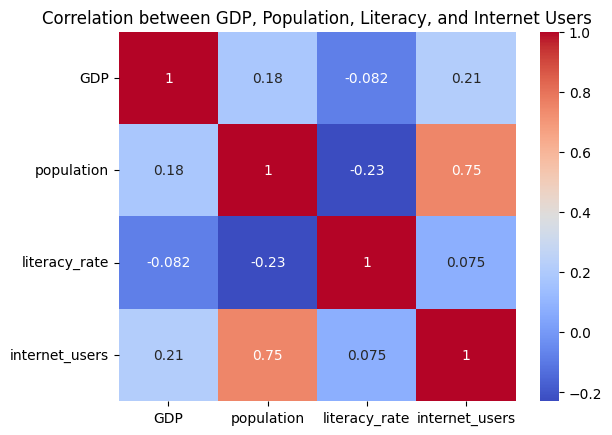

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged_df[['GDP', 'population', 'literacy_rate', 'internet_users']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between GDP, Population, Literacy, and Internet Users')
plt.show()

In [45]:
print(corr)

                     GDP  population  literacy_rate  internet_users
GDP             1.000000    0.183118      -0.081700        0.212559
population      0.183118    1.000000      -0.229585        0.749573
literacy_rate  -0.081700   -0.229585       1.000000        0.074808
internet_users  0.212559    0.749573       0.074808        1.000000


In [46]:
import sqlite3

In [47]:
conn = sqlite3.connect("country_info.db")
cursor = conn.cursor()

In [49]:
merged_df.to_sql("final_dataset",conn,if_exists="replace",index=False)

20

In [50]:
cursor.execute("select * from final_dataset")

In [52]:
print(cursor.fetchall())

[('United States', 10450436373455, 1278642419, 745595490, 58.311493418395656, 72.7), ('China', 5086547998939, 792846414, 685275917, 86.4323663321759, 82.2), ('India', 14540718118693, 1001406378, 606850704, 60.59984411243684, 80.3), ('Japan', 12473835857216, 1206263687, 1112451555, 92.22291667974251, 97.5), ('Germany', 2038442396490, 428734972, 246827121, 57.57102571982395, 92.9), ('Russia', 10987125474745, 420968276, 162156967, 38.51999693202535, 89.1), ('Brazil', 8793052816619, 675094950, 24027075, 3.5590660247125236, 81.0), ('United Kingdom', 11799848684255, 674991378, 266047041, 39.41487990384375, 82.9), ('France', 7758669752269, 434389014, 216417853, 49.82120772511065, 97.6), ('Italy', 12907234326850, 254467210, 87191493, 34.264333310370326, 83.7), ('Canada', 8158351525190, 1438267572, 894102645, 62.165250917581005, 70.8), ('Australia', 5444267975247, 439285667, 201619113, 45.89703879412027, 71.6), ('South Korea', 6562909541266, 618608295, 291770691, 47.165660945429124, 66.4), ('Sp

In [55]:
#Countries with highest internet penetration

cursor.execute("select country from final_dataset order by penetration_rate desc limit 1 ")
print(cursor.fetchall())

[('Japan',)]


In [57]:
#Average literacy rate

cursor.execute("select AVG(literacy_rate) from final_dataset")
print(cursor.fetchall())

[(78.43,)]


In [59]:
#Correlation between literacy rate and internet penetration

cursor.execute("""SELECT
    (COUNT(*) * SUM(literacy_rate * penetration_rate) - SUM(literacy_rate) * SUM(penetration_rate)) /
    (SQRT(COUNT(*) * SUM(literacy_rate * literacy_rate) - SUM(literacy_rate) * SUM(literacy_rate)) *
     SQRT(COUNT(*) * SUM(penetration_rate * penetration_rate) - SUM(penetration_rate) * SUM(penetration_rate))
    ) AS correlation
FROM final_dataset;""")
print(cursor.fetchall())

[(0.2353300920270708,)]


In [65]:
#GDP per capita analysis

cursor.execute("SELECT country,(GDP / population) AS GDP_per_capita FROM final_dataset order by GDP_per_capita desc")
print(cursor.fetchall())

[('Indonesia', 132792), ('Italy', 50722), ('Russia', 26099), ('France', 17861), ('United Kingdom', 17481), ('Spain', 16998), ('India', 14520), ('Brazil', 13024), ('Australia', 12393), ('South Korea', 10609), ('Turkey', 10437), ('Japan', 10340), ('Saudi Arabia', 9239), ('United States', 8173), ('China', 6415), ('Argentina', 6118), ('Canada', 5672), ('Germany', 4754), ('Mexico', 4249), ('South Africa', 3630)]


In [67]:
#Which countries have a GDP per capita above $10,000?

cursor.execute("SELECT country,(GDP / population) AS GDP_per_capita FROM final_dataset WHERE GDP_per_capita>10000")
print(cursor.fetchall())

[('India', 14520), ('Japan', 10340), ('Russia', 26099), ('Brazil', 13024), ('United Kingdom', 17481), ('France', 17861), ('Italy', 50722), ('Australia', 12393), ('South Korea', 10609), ('Spain', 16998), ('Indonesia', 132792), ('Turkey', 10437)]


In [68]:
#What is the total population covered in the dataset?

cursor.execute("SELECT SUM(population) FROM final_dataset")
print(cursor.fetchall())

[(14864685089,)]


In [72]:
#Which countries have the lowest literacy rates, and how does that impact internet access?

cursor.execute("SELECT country from final_dataset order by literacy_rate asc limit 1")
print("country which has lowest literacy_rate=",cursor.fetchone())

cursor.execute("SELECT country,literacy_rate,internet_users FROM final_dataset order by literacy_rate")
cursor.fetchall()

country which has lowest literacy_rate= ('Saudi Arabia',)


[('Saudi Arabia', 60.5, 108944665),
 ('Spain', 60.6, 794943861),
 ('South Korea', 66.4, 291770691),
 ('Argentina', 67.8, 421477197),
 ('Canada', 70.8, 894102645),
 ('Turkey', 71.4, 128924625),
 ('Australia', 71.6, 201619113),
 ('United States', 72.7, 745595490),
 ('Indonesia', 75.4, 4584702),
 ('Mexico', 76.5, 135489564),
 ('India', 80.3, 606850704),
 ('Brazil', 81.0, 24027075),
 ('China', 82.2, 685275917),
 ('United Kingdom', 82.9, 266047041),
 ('Italy', 83.7, 87191493),
 ('South Africa', 87.7, 739194223),
 ('Russia', 89.1, 162156967),
 ('Germany', 92.9, 246827121),
 ('Japan', 97.5, 1112451555),
 ('France', 97.6, 216417853)]

The literacy rate and internet users are positively correlated for Saudi Arabia, which has the lowest literacy rate and the lowest internet users. This also affects the population; when the population is large and the literacy rate is low, the number of internet users is higher compared to other countries that have a literacy rate lower than that country.

In [73]:
#What are the top 5 wealthiest countries by total GDP, and how does that compare with population size?

cursor.execute("SELECT country,GDP,population FROM final_dataset order by GDP desc limit 5")
print(cursor.fetchall())

[('Spain', 15275513099842, 898664919), ('India', 14540718118693, 1001406378), ('Italy', 12907234326850, 254467210), ('Japan', 12473835857216, 1206263687), ('Indonesia', 12404144955318, 93409749)]


India has hidher population and lower gdp compared to spain therfore, A large population doesn’t always mean a higher total GDP.
Countries with smaller populations like Spain or Italy may have higher GDP per person.
 Population size can magnify or obscure wealth distribution patterns.
This visualization helps compare both economic size and demographic scale.

In [74]:
#Find countries where internet users exceed 70% of the population

cursor.execute("SELECT country,(internet_users*100/population) as percent from final_dataset WHERE percent>70")
print(cursor.fetchall())

[('China', 86), ('Japan', 92), ('Spain', 88), ('South Africa', 80)]


In [77]:
#What is the average GDP per capita for countries with internet penetration above 50%?

cursor.execute("SELECT AVG(GDP/population) from final_dataset WHERE penetration_rate>50")
print(cursor.fetchone())

(8993.222222222223,)


In [79]:
#How many countries have a literacy rate above 90%, and what is their average internet penetration?

cursor.execute("SELECT COUNT(*),Avg(penetration_rate) FROM final_dataset WHERE literacy_rate>90 ")
print(cursor.fetchall())

[(3, 66.53838337489236)]
